# PHYS 6260: Homework 1, Your name

## Problem 1

You can write your assumptions and a description of the code here before presenting it.
* Physics is great
* Computers are fast
* CompPhys cannot wait
* Paper is the past

You can also include LaTeX inline.
\begin{equation}
z = \int_0^a x^2 dx
\end{equation}

See http://en.wikibooks.org/wiki/LaTeX/Mathematics for a tutorial on typesetting math with LaTeX.

### Part (a)

In [2]:
from math import *
x = 8.
y = 3.
z = x**y
print(f"The answer is {z:.4f}")

The answer is 512.0000


### Part (b)

In [3]:
# Inline comment
a = z*log(z)
print(f"a = {z}")

a = 512.0


### Part (c)
If a written answer (not code) is requested, then type it up in a markdown box, like this.

And we conclude.

## Problem 2
... and so on.

In [4]:
prob2_answer = 182.
print(prob2_answer)

182.0


## Problem 2(a)
##### Using numpy, create a 100x3 array with random numbers that represents 100 position vectors in Cartesian coordinates.

This block uses numpy to create a 100 x 3 array filled with random numbers\
The shape of the array is subsequently verified.

In [15]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import constants

rand_pos = np.random.rand(100,3)

print(np.shape(rand_pos))
# Verify with sanity check
print('Position 0: ('+str(rand_pos[0,0])+', '+str(rand_pos[0,1])+', '+str(rand_pos[0,2])+')')
# alternatively,
print('Position 0: '+str(rand_pos[0]))
# Interesting that these have different default levels of rounding.
# To verify the coordinate transformation later...
print(np.linalg.norm(rand_pos[0,0:1]))

(100, 3)
Position 0: (0.9451515751181601, 0.006332652202074351, 0.023219361879578404)
Position 0: [0.94515158 0.00633265 0.02321936]
0.9451515751181601


## Problem 2(b)
##### Using matplotlib, create a scatter plot of the (x,z) coordinates. Label your axes!

This block uses matplotlib.pyplot.scatter to create a scatter plot of the x-z plane using our randomized coordinates.\
Coloring is based on magnitude of the position vector (in 3D-space, __not__ the x-z plane!)

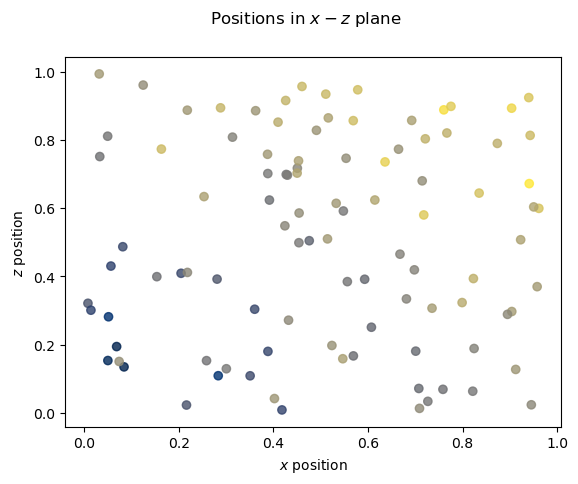

In [16]:
fig, ax = plt.subplots()
# calculate magnitudes for coloring purposes
mag = np.linalg.norm(rand_pos, axis=1)
# scatter plot
plt.scatter(rand_pos[:,0],rand_pos[:,2], c=mag, cmap = 'cividis', alpha = 0.95)
# labels
fig.suptitle(r'Positions in $x-z$ plane')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$z$ position')


plt.show()

## Problem 2(c)
##### Create a function that converts Cartesian coordinates to cylindrical coordinates.

Now we create a function to convert an array of cartesian vectors to an array of cylindrical vectors. That is, we map
\begin{equation}
    (x,y,z)\mapsto(r,\vartheta,z)
\end{equation}
via the relationship 
\begin{align}
    r = \sqrt{x^2 + y^2} \\
    \vartheta = \arctan{\left(\frac{y}{x}\right)} \\
    z = z \qquad ,
\end{align}
which we can readily acheive with the tools of python.\
\
Our approach will involve defining a function that enforces the above relationship, and applying it to our array of positions.
Then, we will plot our transformed coordinates in the $r-\theta$ plane, visualizing the conversion and coloring by radial distance from the origin.
That is, lighter yellows represent larger $|\mathbf{r}|$ values, and darker blues represent smaller values. 
    

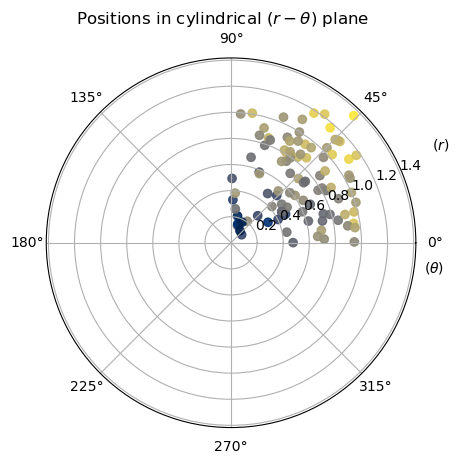

In [60]:
# function to convert cartesian position vector array to cylindrical coordinates
def cyl(rand_pos):
    r = np.sqrt(rand_pos[:,0]**2 + rand_pos[:,1]**2)
    th = np.arctan(rand_pos[:,1]/rand_pos[:,0])
    z = rand_pos[:,2]
    return r, th, z

cyl_pos = np.zeros_like(rand_pos)

cyl_pos[:,0], cyl_pos[:,1], cyl_pos[:,2] = cyl(rand_pos)


# plot in cylindrical scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

f = ax.scatter(cyl_pos[:,1], cyl_pos[:,0], c=mag, cmap = 'cividis', alpha = 0.9)
# labels
fig.suptitle(r'Positions in cylindrical $(r-\theta)$ plane')
ax.text(m.pi/7.2,1.7,r'$(r)$')
ax.text(-0.15,1.5,r'$(\theta)$')

#sanity check to make sure that conversion was done correctly: any (x,y) that have r>1 should average to > 1/sqrt(2) 
#print(rand_pos[np.where(cyl_pos[:,0] > 1.),:])

plt.show()

## Problem 2(d)
##### Using numpy, compute the mean, minimum, and maximum values of the radial coordinate.

To do this, we will take advantage of the suite of statistical functions already well-developed within the numpy library. Specifically, we will lean on np.mean, np.min, and np.max

In [74]:
# define 1x100 arr for simplicity
radial_coord = cyl_pos[:,0]
# call numpy prebuilts
mean_r = np.mean(radial_coord)
max_r = np.max(radial_coord)
min_r = np.min(radial_coord)
median_r = np.median(radial_coord)

# print output
print('\n__ Statistics of randomized radial coordinate __ ')
print('mean r: '+str(mean_r))
print('median r: '+str(median_r))
print('If the median is greater than the mean, the distribution is weighted toward r > r_mean. \n')
print('maximum r value: '+str(max_r))
print('minimum r value: '+str(min_r)+'\n')


__ Statistics of randomized radial coordinate __ 
mean r: 0.7401588080719717
median r: 0.8014058850240751
Since the median is greater than the mean, the distribution is weighted toward r > r_mean. 

maximum r value: 1.3544268228130225
minimum r value: 0.10206753999441005

